# **K-Means Clustering**

`Clustering`

>Clustering is an unsupervised machine learning technique that groups similar data points together without using labeled output.

>Example: Grouping customers by buying behavior, grouping images by similarity, etc.

`K-Means`

>K-Means is a popular clustering algorithm that:

1-Selects K cluster centers (centroids).

2-Assigns every data point to the nearest centroid.

3-Recalculates centroids.

4-Repeats until results stabilize.


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#checking missing values
print(df.isnull().sum())
print('number of duplicates:',df.duplicated().sum())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
number of duplicates: 0


In [5]:
x = df.drop(columns=['CustomerID', 'Gender', 'Age'])

In [6]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

### Feature Scaling
K-Means is distance-based; scaling helps avoid bias due to large-scaled features.

In [7]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_scaled[:10]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002]])

### Train K-Mean model

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=5, random_state=42)

In [9]:
# Predictions
clusters = kmeans.labels_
df["pred_cluster"] = clusters

In [10]:
# Checking Cluster Centers
print(kmeans.cluster_centers_)

[[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]


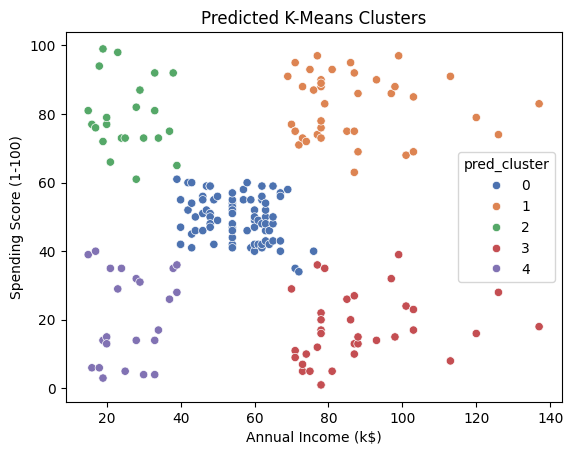

In [11]:
# Predicted clusters
sns.scatterplot(
    x=df["Annual Income (k$)"],
    y=df["Spending Score (1-100)"],
    hue=df["pred_cluster"],
    palette="deep",

)
plt.title("Predicted K-Means Clusters")

plt.show()

## Measuring the Performance of K-Means Clustering

`1.Inertia`

>Measures how close the points in a cluster are to their centroid.

>Lower inertia means better clustering.

In [12]:
inertia = kmeans.inertia_

print("Inertia:", inertia)

Inertia: 65.5684081557168


`2. Silhouette Score (Best for Quality Assessment)`

Measures how well-separated the clusters are.

Score ranges from -1 to 1:

* +1 → Clusters are well-separated.
* 0 → Clusters are overlapping.
* -1 → Poor clustering (wrong clustering).

In [13]:
from sklearn.metrics import silhouette_score

clusters = kmeans.labels_

silhouette = silhouette_score(x_scaled, clusters)

print("Silhouette Score:", silhouette)

Silhouette Score: 0.5546571631111091


`3.Davies-Bouldin Index`

* Measures the similarity between clusters.
* Lower is better (closer clusters mean worse clustering).

In [14]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(x_scaled, clusters)

print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 0.5722356162263352


## Choosing the Right K – Elbow Method

The Elbow Method helps find the best number of clusters.

### Logic

* Run K-Means for many K values.
* Compute **inertia** (within-cluster sum of distances).
* Plot K vs inertia.
* The point where graph bends (“elbow”) is good.


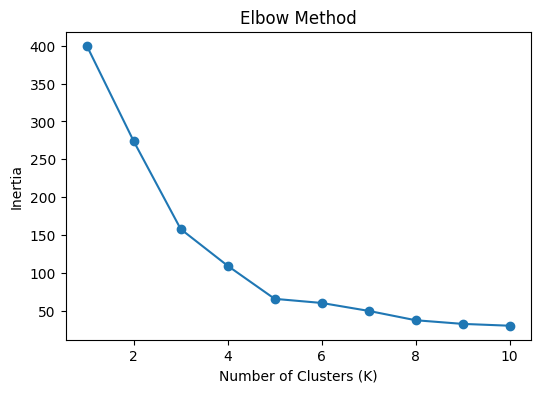

In [15]:


inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

### Parameter	Default Value	Meaning	Notes / How to 

`n_clusters	8`	

* Number of clusters to form

* Usually selected using Elbow Method or Silhouette Score

`init`	

* 'k-means++'	

* Method used for choosing initial centroids	

* 'k-means++' is faster and smarter; 'random' picks random starting points

`n_init	`

* 10 (old versions) / auto (newer versions)

* Number of runs with different centroid initializations	

* Best clustering (lowest inertia) is selected

* max_iter	300	Maximum iterations allowed for a single run	Increase if convergence is slow


In [16]:
KMeans(
    n_clusters=5,
    init='k-means++',
    n_init='auto',
    max_iter=300,

)


KMeans(n_clusters=5)

# **DBSCAN**

### 1. Introduction to DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups data points based on density and identifies sparse points as noise.

In [17]:
# load dataset
x=df.drop(['CustomerID','Gender','Age'],axis=1)


### 2. scaling data

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

### 3. Choosing eps Using K-Distance Graph

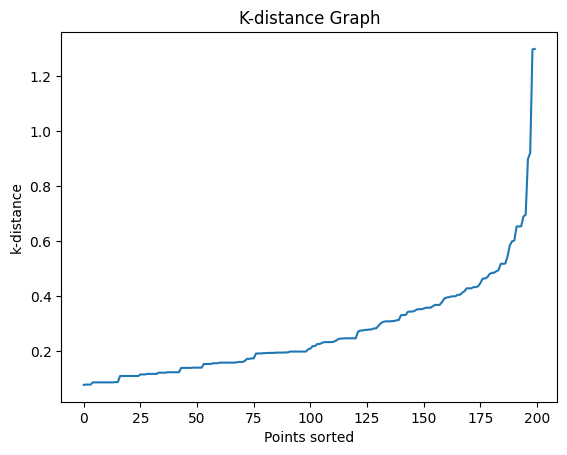

In [19]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

distances = np.sort(distances[:, 4])
plt.plot(distances)
plt.title("K-distance Graph")
plt.xlabel("Points sorted")
plt.ylabel("k-distance")
plt.show()

### 4. Apply DBSCAN

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan.fit(X_scaled)
df["cluster"] = dbscan.labels_
df["cluster"].value_counts()

cluster
2    81
3    39
4    35
0    23
1    22
Name: count, dtype: int64

In [21]:
x


,Annual Income (k$),Spending Score (1-100),pred_cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


### 5. Visualize DBSCAN Clusters

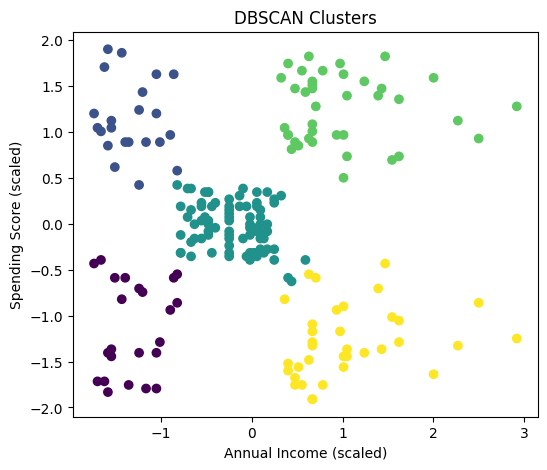

In [28]:
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df["cluster"])
plt.title("DBSCAN Clusters")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()

### 6. Evaluate Clustering

In [23]:
from sklearn.metrics import silhouette_score

labels = dbscan.labels_
mask = labels != -1
if len(set(labels[mask])) > 1:
    print("Silhouette Score:", silhouette_score(X_scaled[mask], labels[mask]))
else:
    print("Not enough clusters for silhouette score.")

Silhouette Score: 0.683709502274508


### 7. Compare with K-Means

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df["kmeans_cluster"] = kmeans.labels_

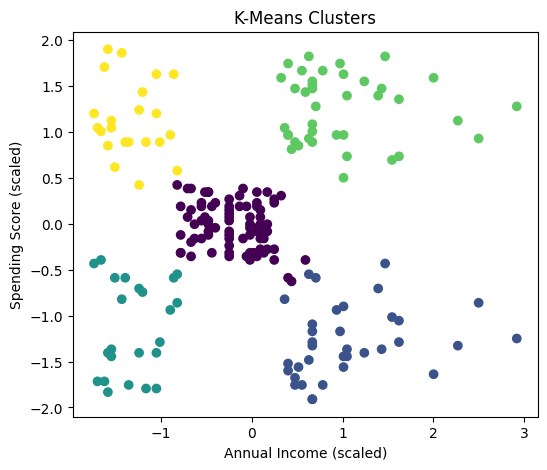

In [31]:
plt.figure(figsize=(6,5))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df["kmeans_cluster"])
plt.title("K-Means Clusters")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.show()